# Dry Bean Classification

## 0. Introduction

In this notebook, a dataset containing features about seven different types of dry beans is analyzed and the objective is to use multiclass classification machine learning algorithms to be able to determine what type of bean a dry bean is based on its shape, form, structure and other attributes.


__Source__

The dataset was obtained from the UC Irvine Machine Learning Repository:
[Dry Bean Dataset](https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset)

KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507

Murat KOKLU<br>
Faculty of Technology,<br>
Selcuk University,<br>
TURKEY<br>
mkoklu@selcuk.edu.tr

Ilker Ali OZKAN<br>
Faculty of Technology,<br>
Selcuk University,<br>
TURKEY<br>
ilkerozkan@selcuk.edu.tr

#### Dataset Information

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

__Features__
- Area (A): _The area of a bean zone and the number of pixels within its boundaries._
- Perimeter (P): _Bean circumference is defined as the length of its border._
- Major axis length (L): _The distance between the ends of the longest line that can be drawn from a bean._
- Minor axis length (l): _The longest line that can be drawn from the bean while standing perpendicular to the main axis._
- Aspect ratio (K): _Defines the relationship between L and l._
- Eccentricity (Ec): _Eccentricity of the ellipse having the same moments as the region._
- Convex area (C): _Number of pixels in the smallest convex polygon that can contain the area of a bean seed._
- Equivalent diameter (Ed): _The diameter of a circle having the same area as a bean seed area._
- Extent (Ex): _The ratio of the pixels in the bounding box to the bean area._
- Solidity (S): _Also known as convexity. The ratio of the pixels in the convex shell to those found in beans._
- Roundness (R): _Calculated with the following formula: (4piA)/(P^2)_
- Compactness (CO): _Measures the roundness of an object: Ed/L_
- ShapeFactor1 (SF1)
- ShapeFactor2 (SF2)
- ShapeFactor3 (SF3)
- ShapeFactor4 (SF4)
- Class: _Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira_

#### Sections

The notebook is split into the following sections:<br>
>__1. Importing and Examination__<br><br>
__2. Data Cleaning__<br><br>
__3. Exploratory Data Analysis__<br><br>
__4. Feature Engineering__<br><br>
__5. Model Building__<br><br>
__6. Conclusion__<br><br>

# 1. Importing and Examination

In [288]:
import pandas as pd
import numpy as np

In [289]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [291]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [292]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


There are no missing values (in the form of null or zero minimum values) which will make modelling quicker and more accurate in Section 5 where machine learning algorithms will be used to classify the beans.

# 2. Data Cleaning

The data provided is already in a usable state and does not require much cleaning. Some of the column names will be renamed for consistency.

In [293]:
# Typo in AspectRatio column name
df.columns = df.columns.str.replace('AspectRation', 'AspectRatio')

# Capital R in Roundness
df.columns = df.columns.str.replace('roundness', 'Roundness')

df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

# 3. Exploratory Data Analysis

Firstly, it is useful to understand the distribution of the numeric attributes.

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [295]:
sns.set_theme(style='whitegrid', palette='magma')

The histograms below will indicate the distribution of each of the features, all of which are numerical.

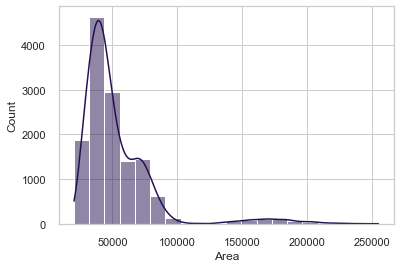

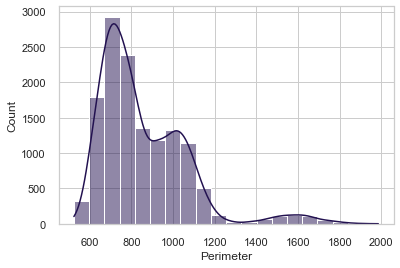

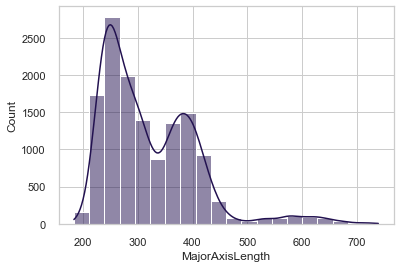

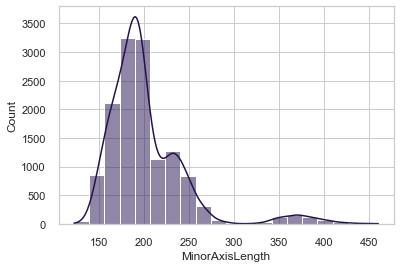

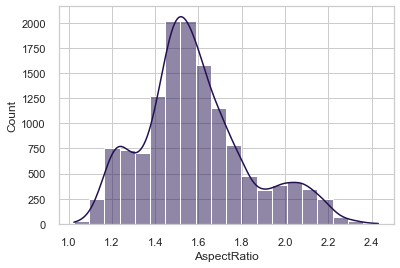

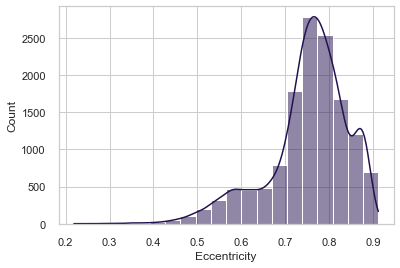

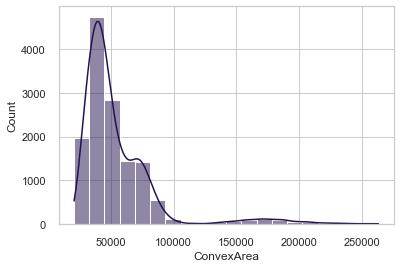

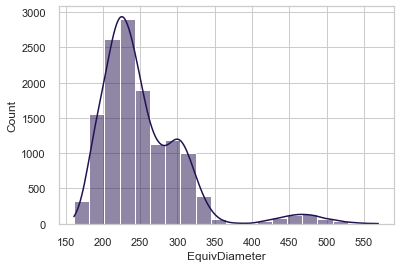

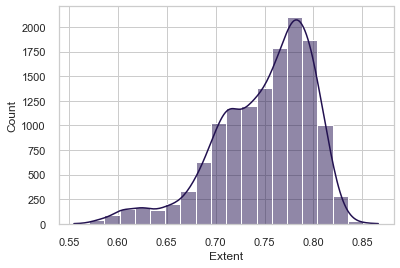

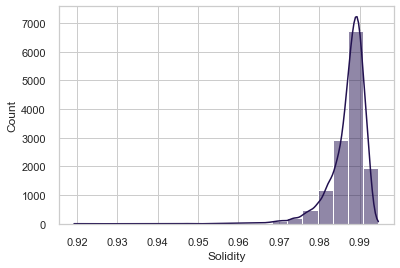

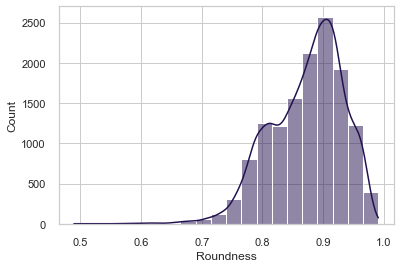

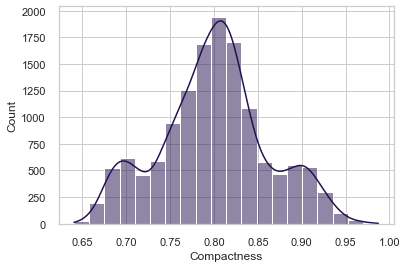

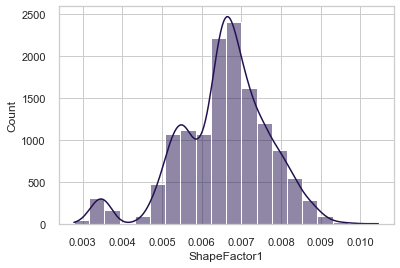

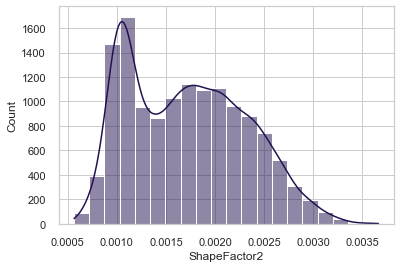

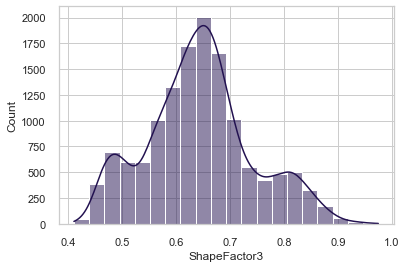

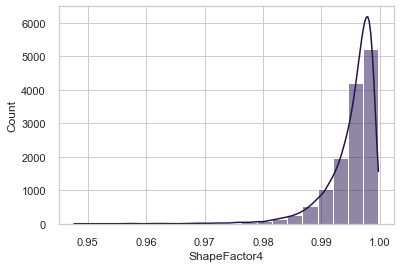

In [296]:
# Dataframe with just numeric attributes
df_numeric = df.drop(columns='Class')

for i in df_numeric.columns:
    sns.histplot(df_numeric, x=i, kde=True, bins=20)
    plt.show()

The following bar plot displays the number of instances of each class is in the dataset.

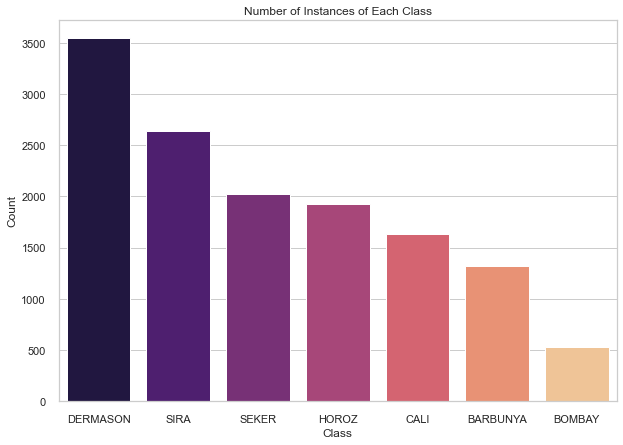

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [297]:
plt.figure(figsize=(10, 7))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), data=df, palette='magma')
plt.title('Number of Instances of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(df['Class'].value_counts())

The differences in distribution for each feature between each class of bean can be visualized with the following violin plots:

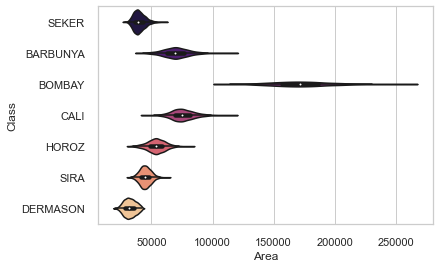

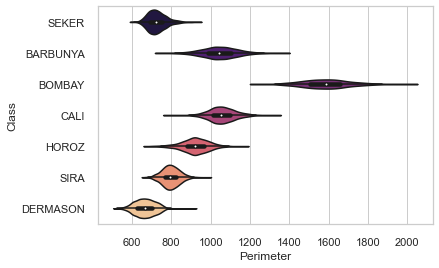

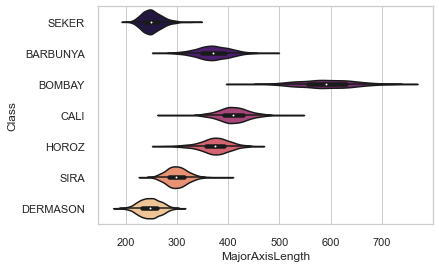

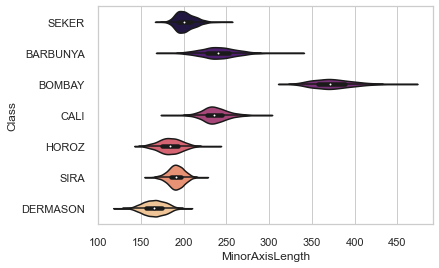

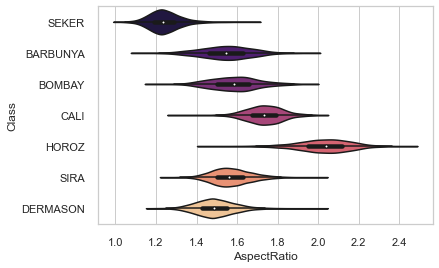

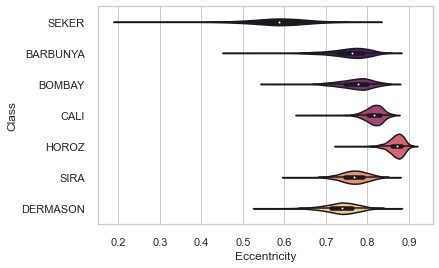

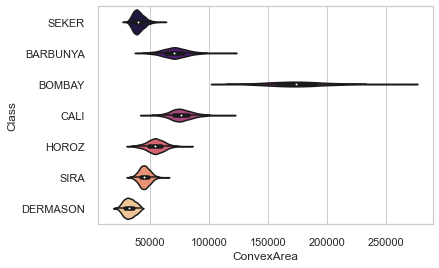

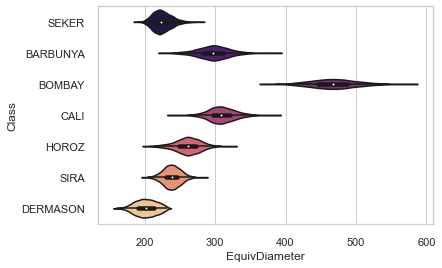

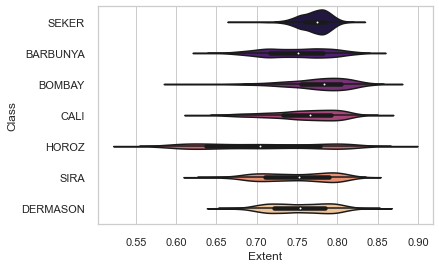

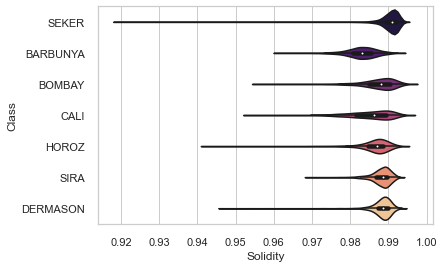

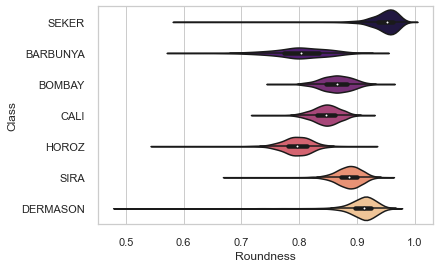

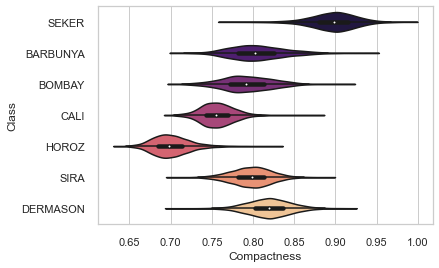

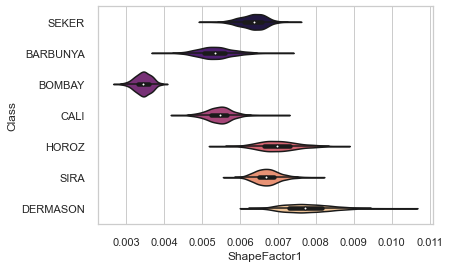

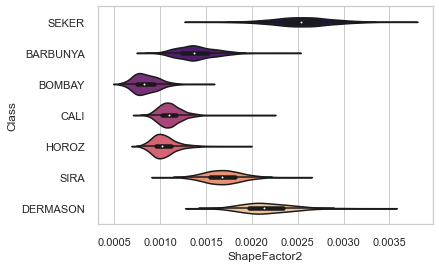

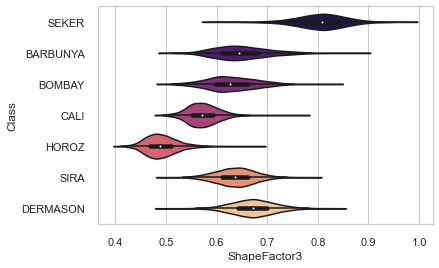

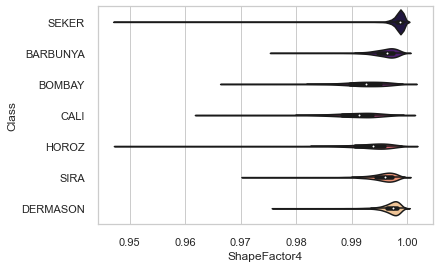

In [298]:
for i in df_numeric.columns:
    sns.violinplot(x=i, y='Class', jitter=0.3, data=df, palette='magma')
    plt.show()

The correlation between features can be indicated with the Pearson Correlation Coefficient which is shown in the heatmap below to illustrate how strongly two features are linearly related.

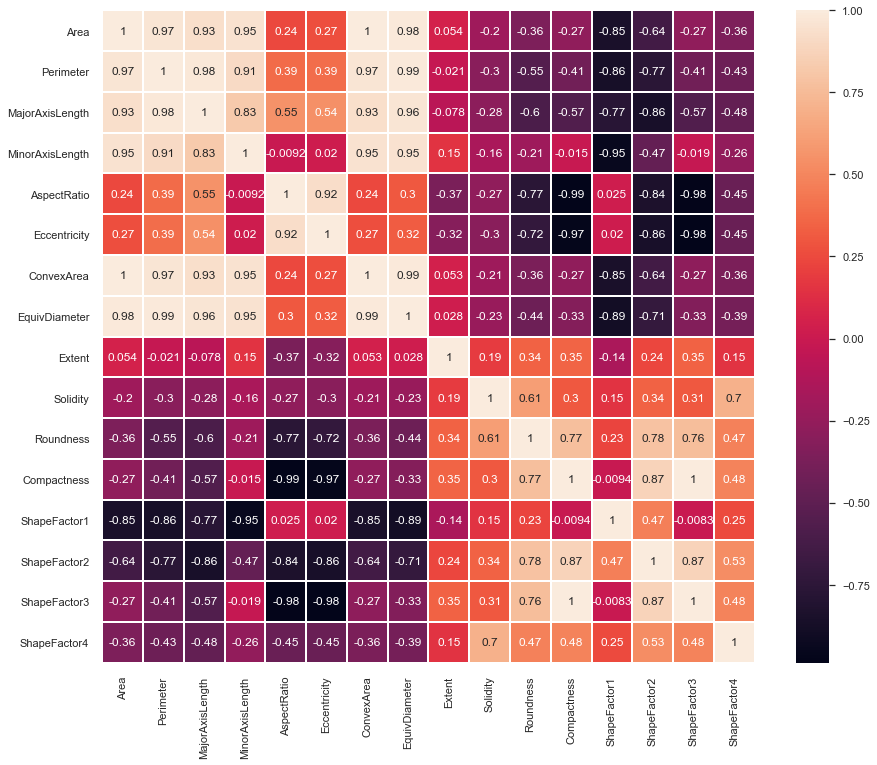

In [299]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_numeric.corr(), linewidths=0.05, square=True, annot=True)
plt.show()

As a number of features seem to have a high correlation with others (which comes as no surprise since the features are measurements of the size and shape of the bean), feature selection, which will be performed after a baseline model is built, is likely to improve model results by reducing multicollinearity.

# 4. Feature Engineering

#### Creating training and test sets

The dataset will be split into 80% training data and 20% test data. The sampling will be stratified by the target (y) to ensure that the class distribution in the training and test sets is approximately the same.

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X = df.drop(columns='Class')
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [302]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10888, 16)
(2723, 16)
(10888,)
(2723,)


#### Normalization

Feature scaling is performed as it will be required for some of the distance-based/ gradient descent algorithms used in the model building section of this project. Normalization transforms the features such that the values are all between zero and one.

In [303]:
from sklearn.preprocessing import MinMaxScaler

In [304]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) # Fit and transform training set
X_test = scaler.transform(X_test)       # Only transform test set

# 5. Model Building

#### Baseline Models

In this section, various multiclass classification algorithms will be tested:
- Gaussian Naive Bayes
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- LightGBM

The performance of each algorithm will be evaluated with a five-fold cross-validation accuracy score (the mean score of the five folds will be taken).

Firstly, the algorithms will be tested without any hyperparameter tuning to provide baseline scores with default values. This is so that tuned model scores can be compared against the baseline to understand how much of an improvement the hyperparameter tuning makes.

Then, the optimal hyperparameters for each model will be found using a Grid Search or Randomized Search which is likely to increase the overall performance.

Finally, a Voting Classifier will be used to combine a selection of different classification algorithms to balance out their individual weaknesses and produce an overall higher-performing model.

In [305]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [306]:
# Creating a list of instances for each algorithm class
classifiers = [
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    LGBMClassifier()    
]

# Creating a list of cross validation scores
cv = KFold(5, shuffle=True, random_state=42)
baseline_scores = [cross_val_score(clf, X_train, y_train, cv=cv).mean() for clf in classifiers]

# Creating a list of classifier names
names = [clf.__class__.__name__ for clf in classifiers]

# Creating a dataframe of the results
results = pd.DataFrame({'Model': names, 'Baseline Score': baseline_scores})
results.style.highlight_max(subset='Baseline Score', color='lightgreen')

[12:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

,Model,Baseline Score
0,GaussianNB,0.896676
1,KNeighborsClassifier,0.920004
2,DecisionTreeClassifier,0.895666
3,RandomForestClassifier,0.924964
4,XGBClassifier,0.927536
5,LGBMClassifier,0.928730


#### Hyperparameter Tuning

A grid search (and randomized search for slower models) will be used to find the best hyperparameters which are likely to increase the scores from the baseline.

Although a grid search of an exhaustive list of values for each parameter of each model would be able to produce the best scores, limitations with computational power and time constraints do not allow for that. Therefore, a selection of more influential parameters with a reasonable range of values has been chosen.

In [307]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [308]:
# Tuning Gaussian Naive Bayes

gnb_params = {
    'var_smoothing': np.logspace(0, -9, 100)
}

gnb_grid = GridSearchCV(classifiers[0], gnb_params, cv=cv, n_jobs=-1)

gnb_grid.fit(X_train, y_train)

print(gnb_grid.best_params_)
print(gnb_grid.best_score_)

{'var_smoothing': 0.0012328467394420659}
0.896951517091827


In [309]:
# Tuning K-Nearest Neighbors

knn_params = {
    'n_neighbors': np.arange(3, 11, 2),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree'],
    'leaf_size': np.arange(1, 50, 5),
    'p': [1,2]
}

knn_grid = GridSearchCV(classifiers[1], knn_params, cv=cv, n_jobs=-1)

knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
0.9228517268564038


In [310]:
# Tuning Decision Tree

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

dt_grid = GridSearchCV(classifiers[2], dt_params, cv=cv, n_jobs=-1)

dt_grid.fit(X_train, y_train)

print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'criterion': 'gini', 'max_features': None}
0.8980544999837605


In [311]:
# Tuning Random Forest

rf_params = {
    'n_estimators': np.arange(100, 501, 200),
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

rf_grid = GridSearchCV(classifiers[3], rf_params, cv=cv, n_jobs=-1)

rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)
print(rf_grid.best_score_)

{'criterion': 'entropy', 'max_features': None, 'n_estimators': 300}
0.9273520269720212


In [312]:
# Tuning XGBoost

xgb_params = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(1, 10, 2),
    'min_child_weight': np.arange(0, 1, 0.25),
    'gamma': [0.5, 1, 2],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
}

xgb_grid = RandomizedSearchCV(classifiers[4], xgb_params, cv=cv, n_iter=25, random_state=42, n_jobs=-1)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

[12:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'n_estimators': 500, 'min_child_weight': 0.25, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}
0.9290051304374602


In [313]:
# Tuning LightGBM

lgb_params = {
    'boosting_type': ['gbdt', 'dart'],
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(1, 10, 2),
    'min_child_weight': np.arange(0, 1, 0.25),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
}

lgb_grid = RandomizedSearchCV(classifiers[5], lgb_params, cv=cv, n_iter=25, random_state=42, n_jobs=-1)

lgb_grid.fit(X_train, y_train)

print(lgb_grid.best_params_)
print(lgb_grid.best_score_)

{'n_estimators': 1000, 'min_child_weight': 0.5, 'max_depth': 5, 'learning_rate': 0.01, 'boosting_type': 'dart'}
0.9297397493538974


In [314]:
# Comparing tuned scores with baseline scores

grid_names = [
    gnb_grid,
    knn_grid,
    dt_grid,
    rf_grid,
    xgb_grid,
    lgb_grid    
]

tuned_scores = [i.best_score_ for i in grid_names]

results['Tuned Score'] = tuned_scores

results.style.highlight_max(subset='Tuned Score', color='lightgreen')

,Model,Baseline Score,Tuned Score
0,GaussianNB,0.896676,0.896952
1,KNeighborsClassifier,0.920004,0.922852
2,DecisionTreeClassifier,0.895666,0.898054
3,RandomForestClassifier,0.924964,0.927352
4,XGBClassifier,0.927536,0.929005
5,LGBMClassifier,0.928730,0.929740


As expected, hyperparameter tuning resulted in an improvement to the score over the baseline models. The following sections will attempt to further increase the cross validation score with other methods.

#### Feature Selection

As seen in the heatmap of Pearson Correlation Coefficients between features above, a number of features are strongly correlated (positively and negatively). The objective in this section is to identify which features have a coefficient above a given threshold that will be defined and drop these columns from the dataset to see if reducing multicollinearity can improve the model scores.

In [315]:
# Function that returns the names of features to be dropped given a threshold correlation value

def drop_features(threshold):
    feature_names = set()
    matrix = df_numeric.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i, j]) > threshold:
                feature_names.add(matrix.columns[i])
    return feature_names

In [316]:
drop = drop_features(0.8)
drop

{'Compactness',
 'ConvexArea',
 'Eccentricity',
 'EquivDiameter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Perimeter',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3'}

In [317]:
# Dropping the columns from the dataset

X_drop = df.drop(columns=drop).drop(columns='Class')
X_drop.head()

,Area,AspectRatio,Extent,Solidity,Roundness,ShapeFactor4
0,28395,1.197191,0.763923,0.988856,0.958027,0.998724
1,28734,1.097356,0.783968,0.984986,0.887034,0.998430
2,29380,1.209713,0.778113,0.989559,0.947849,0.999066
3,30008,1.153638,0.782681,0.976696,0.903936,0.994199
4,30140,1.060798,0.773098,0.990893,0.984877,0.999166


In [318]:
# Creating new test and training set

X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.2, random_state=42, stratify=y)

In [319]:
print(X_train_drop.shape)
print(X_test_drop.shape)
print(y_train.shape)
print(y_test.shape)

(10888, 6)
(2723, 6)
(10888,)
(2723,)


#### Rerunning algorithms with reduced dimensionality

In [320]:
# Gaussian Naive Bayes

gnb_grid_drop = GridSearchCV(classifiers[0], gnb_params, cv=cv, n_jobs=-1)

gnb_grid_drop.fit(X_train_drop, y_train)

print(gnb_grid_drop.best_params_)
print(gnb_grid_drop.best_score_)

{'var_smoothing': 1e-09}
0.6494315097355143


In [321]:
# K-Nearest Neighbors

knn_grid_drop = GridSearchCV(classifiers[1], knn_params, cv=cv, n_jobs=-1)

knn_grid_drop.fit(X_train_drop, y_train)

print(knn_grid_drop.best_params_)
print(knn_grid_drop.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.6025906115061332


In [322]:
# Decision Tree

dt_grid_drop = GridSearchCV(classifiers[2], dt_params, cv=cv, n_jobs=-1)

dt_grid_drop.fit(X_train_drop, y_train)

print(dt_grid_drop.best_params_)
print(dt_grid_drop.best_score_)

{'criterion': 'entropy', 'max_features': None}
0.8994322900783001


In [323]:
# Random Forest

rf_grid_drop = GridSearchCV(classifiers[3], rf_params, cv=cv, n_jobs=-1)

rf_grid_drop.fit(X_train_drop, y_train)

print(rf_grid_drop.best_params_)
print(rf_grid_drop.best_score_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300}
0.9301072275348803


In [324]:
# XGBoost

xgb_grid_drop = RandomizedSearchCV(classifiers[4], xgb_params, cv=cv, n_iter=25, random_state=42, n_jobs=-1)

xgb_grid_drop.fit(X_train_drop, y_train)

print(xgb_grid_drop.best_params_)
print(xgb_grid_drop.best_score_)

[13:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'n_estimators': 500, 'min_child_weight': 0.25, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.5}
0.9296481328927981


In [325]:
# Tuning LightGBM

lgb_grid_drop = RandomizedSearchCV(classifiers[5], lgb_params, cv=cv, n_iter=25, random_state=42, n_jobs=-1)

lgb_grid_drop.fit(X_train_drop, y_train)

print(lgb_grid_drop.best_params_)
print(lgb_grid_drop.best_score_)

{'n_estimators': 1000, 'min_child_weight': 0.5, 'max_depth': 9, 'learning_rate': 0.01, 'boosting_type': 'dart'}
0.9293729882446632


In [326]:
# Comparing scores with removed features to tuned and baseline scores

grid_names_drop = [
    gnb_grid_drop,
    knn_grid_drop,
    dt_grid_drop,
    rf_grid_drop,
    xgb_grid_drop,
    lgb_grid_drop 
]

drop_scores = [i.best_score_ for i in grid_names_drop]

results['Dropped Score'] = drop_scores

results.style.highlight_max(subset='Tuned Score', color='lightgreen')

,Model,Baseline Score,Tuned Score,Dropped Score
0,GaussianNB,0.896676,0.896952,0.649432
1,KNeighborsClassifier,0.920004,0.922852,0.602591
2,DecisionTreeClassifier,0.895666,0.898054,0.899432
3,RandomForestClassifier,0.924964,0.927352,0.930107
4,XGBClassifier,0.927536,0.929005,0.929648
5,LGBMClassifier,0.928730,0.929740,0.929373


Scores show that removing similar features had an adverse effect on Naive Bayes and K-Nearest Neighbors models and very minimal effect on the rest. This shows that multicollinearity can be safely ignored in this case. The original tuned scores will be used going forward.

#### Model Ensemble

In [327]:
from sklearn.ensemble import VotingClassifier

In [328]:
# Baseline Voting Classifier

clf1 = rf_grid.best_estimator_
clf2 = xgb_grid.best_estimator_
clf3 = lgb_grid.best_estimator_

vc = VotingClassifier([('clf1', clf1), ('clf2', clf2), ('clf3', clf3)])

voting_score = cross_val_score(vc, X_train, y_train, cv=cv).mean()

voting_score

[14:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9302911353481363

In [329]:
results = results.append({'Model': vc.__class__.__name__, 'Baseline Score': voting_score}, ignore_index=True)
results

,Model,Baseline Score,Tuned Score,Dropped Score
0,GaussianNB,0.896676,0.896952,0.649432
1,KNeighborsClassifier,0.920004,0.922852,0.602591
2,DecisionTreeClassifier,0.895666,0.898054,0.899432
3,RandomForestClassifier,0.924964,0.927352,0.930107
4,XGBClassifier,0.927536,0.929005,0.929648
5,LGBMClassifier,0.928730,0.929740,0.929373
6,VotingClassifier,0.930291,NaN,NaN


The voting classifier ensemble can also be tuned like the other algorithms with two hyperparameters - 'weights' and 'voting'. 'weights' allows models in the ensemble to be assigned a weighting such that stronger models can be prioritized. 'voting' indicates either soft or hard voting where in soft voting, the target label with the greatest sum of weighted probabilities wins the vote and in hard voting the taregt label with the majority vote of the three classifiers wins.

In [330]:
# Tuning Voting Classifier

vc_params = {
    'weights': [(1, 1, 1),
                (2, 1, 1),
                (1, 2, 1),
                (1, 1, 2)],
    'voting': ['hard', 'soft']}

vc_grid = GridSearchCV(vc, vc_params, cv=cv, n_jobs=-1)

vc_grid.fit(X_train, y_train)

print(vc_grid.best_params_)
print(vc_grid.best_score_)

[15:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'voting': 'soft', 'weights': (1, 1, 2)}
0.9304748744386278


In [331]:
results.iloc[6, 2] = vc_grid.best_score_
results.style.highlight_max(subset='Tuned Score', color='lightgreen')

,Model,Baseline Score,Tuned Score,Dropped Score
0,GaussianNB,0.896676,0.896952,0.649432
1,KNeighborsClassifier,0.920004,0.922852,0.602591
2,DecisionTreeClassifier,0.895666,0.898054,0.899432
3,RandomForestClassifier,0.924964,0.927352,0.930107
4,XGBClassifier,0.927536,0.929005,0.929648
5,LGBMClassifier,0.928730,0.929740,0.929373
6,VotingClassifier,0.930291,0.930475,nan


A soft voting classifier with double the weight given to the LightGBM classifier produced the best results with the highest accuracy score of all the models tested thus far.

#### Model Evaluation

In the following section, the top four models (Random Forest, XGBoost, LightGBM and Voting Classifier) cross-validated on the training set will be used to classify dry beans in the test set.

The performance metrics to evaluate the models will be:

- __Precision:__ <br>_tp / (tp + fp)_<br>
where tp is the number of true positives and fp is the number of false positives. Measures the ability of a classifier not to label a nagative sample as positive.
- __Recall:__ <br>_tp / (tp + fn)_ <br>where tp is the number of true positives and fn is the number of false negatives. Measures the ability of a classifier to find all positive samples per class.
- __F1 Score:__ <br>A weighted harmonic mean of precision and recall normalized between 0 and 1. F1 score of 1 indicates a perfect balance as precision and the recall are inversely related.

In [332]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [333]:
# Test set predictions

test_models = [
    rf_grid,
    xgb_grid,
    lgb_grid,
    vc_grid
]

predictors = [i.predict(X_test) for i in test_models]

In [334]:
# Precision scores
precision = [np.round(precision_score(y_test, j, average=None, labels=clf1.classes_), decimals=3) for j in predictors]

# Recall scores
recall = [np.round(recall_score(y_test, j, average=None, labels=clf1.classes_), decimals=3) for j in predictors]

# F1 scores
f1 = [np.round(f1_score(y_test, j, average=None, labels=clf1.classes_), decimals=3) for j in predictors]

In [335]:
# Random Forest Scores
rf_scores = pd.DataFrame({
    'Class': clf1.classes_,
    'Precision': precision[0],
    'Recall': recall[0],
    'F1': f1[0]
})

rf_scores.set_index('Class', inplace=True)

# XGBoost Scores
xgb_scores = pd.DataFrame({
    'Precision': precision[1],
    'Recall': recall[1],
    'F1': f1[1]
})

# LightGBM Scores
lgb_scores = pd.DataFrame({
    'Precision': precision[2],
    'Recall': recall[2],
    'F1': f1[2]
})

# Voting Classifier Scores
vc_scores = pd.DataFrame({
    'Precision': precision[3],
    'Recall': recall[3],
    'F1': f1[3]
})

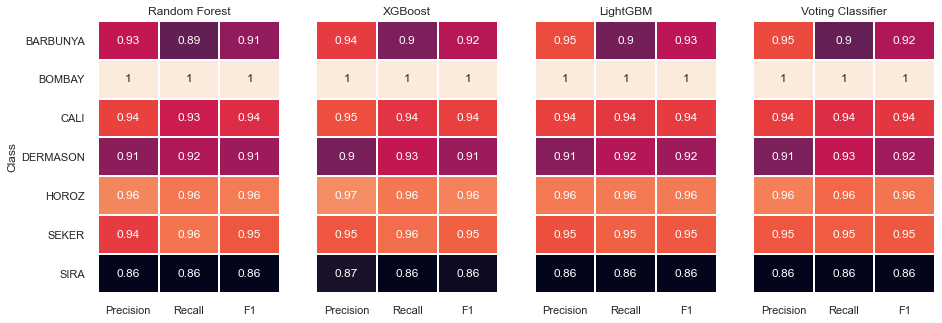

In [336]:
# Heatmap of the scores for each classifier
fig, ax = plt.subplots(1, 4)
fig.set_figheight(5)
fig.set_figwidth(15)
sns.heatmap(rf_scores, linewidths=0.05, annot=True, cbar=False, ax=ax[0])
sns.heatmap(xgb_scores, linewidths=0.05, annot=True, cbar=False, yticklabels=False, ax=ax[1])
sns.heatmap(lgb_scores, linewidths=0.05, annot=True, cbar=False, yticklabels=False, ax=ax[2])
sns.heatmap(vc_scores, linewidths=0.05, annot=True, cbar=False, yticklabels=False, ax=ax[3])
ax[0].title.set_text('Random Forest')
ax[1].title.set_text('XGBoost')
ax[2].title.set_text('LightGBM')
ax[3].title.set_text('Voting Classifier')
fig.show()

It seems that all models are able to correctly classify the Bombay class (most likely due to its having distinct shape or form) and they are classifying Sira the least accurately.

The difference in precision, recall and F1 scores for the four algorithms is not much and they all display the same trends in scores for each class as shown on the heatmap above.

Their classification accuracy can also be evaluated with a confusion matrix which displays the percentage of correct and incorrect predictions by class. This easily shows which bean classes are easily confused with others, perhaps due to similar properties in shape or size.

In [337]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [338]:
rf_cm = confusion_matrix(y_test, predictors[0],
                         normalize='true',
                         labels=clf1.classes_)
rf_disp = ConfusionMatrixDisplay(rf_cm, display_labels=clf1.classes_)

xgb_cm = confusion_matrix(y_test, predictors[1],
                         normalize='true',
                         labels=clf1.classes_)
xgb_disp = ConfusionMatrixDisplay(xgb_cm, display_labels=clf1.classes_)

lgb_cm = confusion_matrix(y_test, predictors[2],
                         normalize='true',
                         labels=clf1.classes_)
lgb_disp = ConfusionMatrixDisplay(lgb_cm, display_labels=clf1.classes_)

vc_cm = confusion_matrix(y_test, predictors[3],
                         normalize='true',
                         labels=clf1.classes_)
vc_disp = ConfusionMatrixDisplay(vc_cm, display_labels=clf1.classes_)

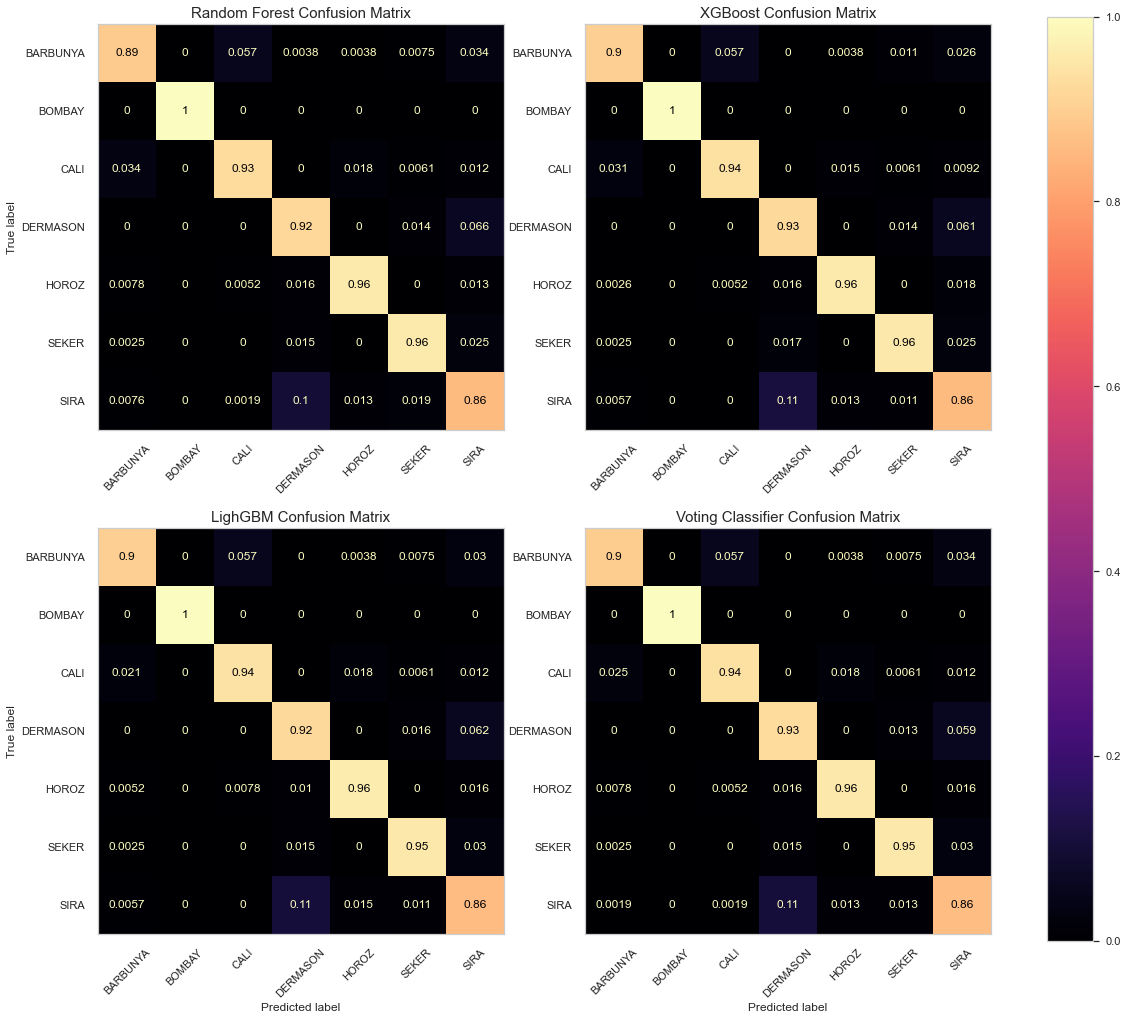

In [339]:
# Creating subplots for each confusion matrix

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 17))

rf_disp.plot(ax=ax1, xticks_rotation=45, cmap='magma')
rf_disp.ax_.set_title('Random Forest Confusion Matrix', fontdict={'fontsize': 15})
rf_disp.im_.colorbar.remove()
rf_disp.ax_.set_xlabel('')
ax1.grid(False)

xgb_disp.plot(ax=ax2, xticks_rotation=45, cmap='magma')
xgb_disp.ax_.set_title('XGBoost Confusion Matrix', fontdict={'fontsize': 15})
xgb_disp.im_.colorbar.remove()
xgb_disp.ax_.set_xlabel('')
xgb_disp.ax_.set_ylabel('')
ax2.grid(False)

lgb_disp.plot(ax=ax3, xticks_rotation=45, cmap='magma')
lgb_disp.ax_.set_title('LighGBM Confusion Matrix', fontdict={'fontsize': 15})
lgb_disp.im_.colorbar.remove()
ax3.grid(False)

vc_disp.plot(ax=ax4, xticks_rotation=45, cmap='magma')
vc_disp.ax_.set_title('Voting Classifier Confusion Matrix', fontdict={'fontsize': 15})
vc_disp.im_.colorbar.remove()
vc_disp.ax_.set_ylabel('')
ax4.grid(False)

fig1.colorbar(vc_disp.im_, ax=((ax1, ax2), (ax3, ax4)))

plt.show()

Again, all four models are displaying very similar percentages for each class pair in the confusion matrix.

# 6.Conclusion

#### Summary

In this project, the objective was to be able to classify dry beans based on their features (shape, size, form etc.). The dataset obtained was explored to provide a better understanding of the distribution and relationships between variables. Then, feature engineering was performed to prepare the data for classification machine learning algorithms and models using various different algorithms were built, tuned and tested.

The evaluation showed that Random Forest, XGBoost, LightGBM and an ensemble of the three models performed the best, producing the highest accuracy scores in cross-validation of the training data. These models were evaluated on the test data and all performed to a similar level. This shows that all four models can be used to classify dry beans effectively.

#### Future Work

Although strong results were obtained from this study, there are areas where improvements could be made in the future to create even better models to make more accurate predictions of used car prices in India. These are listed below:

- A grid search of a larger range of values could find more optimal hyperparameters for each of the algorithms but greater computational power would be needed which was a limiting factor in this analysis
- Linear classification algorithms could be tested (e.g. logistic regression, support vector machines) to evaluate if they could perform better
- More dry bean features (e.g. colour, texture) could be obtained to better differentiate between classes and allow models to classify more accurately
- More samples of dry bean could be measured and added to the dataset